# Bonus

🎯 You are a Data Scientist for a bank. You are asked to develop a model that is able to detect at least 90% of fraudulent transactions. Go!

👇 Load the player `creditcard.csv` dataset and display its first 5 rows.

In [14]:
import pandas as pd

data = pd.read_csv("data/creditcard.csv")

data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-6.677212,5.529299,-7.193275,6.081321,-1.636071,0.500610,-4.640770,-4.339840,-0.950036,0.566680,...,5.563301,-1.608272,0.965322,0.163718,0.047531,0.466165,0.278547,1.471988,105.89,1
1,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
2,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,-3.976525,...,0.247913,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,1.00,1
3,-1.309441,1.786495,-1.371070,1.214335,-0.336642,-1.390120,-1.709109,0.667748,-1.699809,-3.843911,...,0.533521,-0.022180,-0.299556,-0.226416,0.364360,-0.475102,0.571426,0.293426,1.00,1
4,0.206075,1.387360,-1.045287,4.228686,-1.647549,-0.180897,-2.943678,0.859156,-1.181743,-3.096504,...,0.469199,0.344930,-0.203799,0.376640,0.715485,0.226003,0.628545,0.319918,0.76,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28476,1.227562,-0.175061,-1.260058,-0.506687,2.050260,3.244372,-0.399434,0.766429,-0.094691,-0.013880,...,-0.228824,-0.917066,0.004006,1.008277,0.455373,0.183782,-0.042999,0.016653,51.12,0
28477,1.441844,-1.113942,0.286378,-1.490768,-1.373094,-0.501686,-0.991316,-0.079635,-2.060922,1.601033,...,-0.168311,-0.202236,-0.043065,-0.015730,0.385321,-0.206204,0.018872,0.012418,43.77,0
28478,1.021356,0.185903,1.001936,2.311964,-0.193103,0.935848,-0.569199,0.492212,-0.522024,0.789036,...,0.237042,0.630162,0.000950,-0.310290,0.211896,0.142460,0.032571,0.011119,10.65,0
28479,0.911762,-1.598431,1.197599,-0.762671,-2.230691,-0.317710,-1.215791,0.164366,-0.303228,0.680106,...,-0.006768,-0.038634,-0.053237,0.577939,-0.286927,1.447662,-0.077883,0.045241,204.00,0


ℹ️ Due to confidentiality issues, the original features have been preprocessed and renamed `V1` to `V28`. There is only one features which has not been transformed, `Amount` which is the transaction Amount. `Class` is the target and it takes value 1 in case of fraud and 0 otherwise.

# Base Logistic Regression

👇 Check class balance.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/gasparburgi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

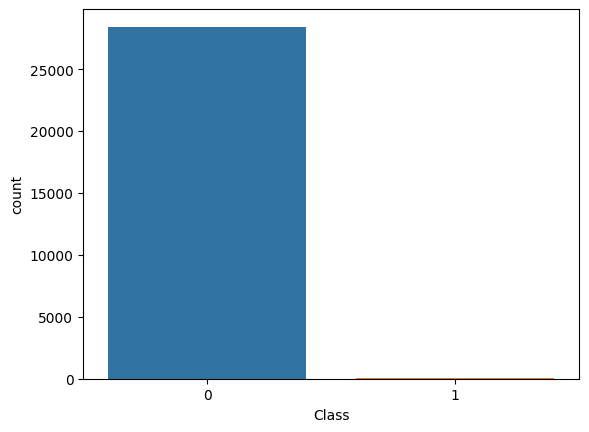

In [3]:
# YOUR CODE HERE
sns.countplot(data.Class)

In [6]:
data.groupby('Class').count()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,28432,28432,28432,28432,28432,28432,28432,28432,28432,28432,...,28432,28432,28432,28432,28432,28432,28432,28432,28432,28432
1,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,49,49


👇 Evaluate a base `LogisticRegression` for Recall. Use model parameter `class_weight = 'balanced'` to ensure it deals with class imbalance.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

In [10]:
X=data[data.columns[:-1]]
y=data[['Class']]

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [35]:
# YOUR CODE HERE
log_model = LogisticRegression(class_weight='balanced',max_iter=1000)
log_model.fit(X_train,y_train)

/Users/gasparburgi/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [37]:
y_train.value_counts()

Class
0        19908
1           28
dtype: int64

In [36]:
log_model.score(X_test,y_test)

0.9981275599765945

In [16]:
y_pred = log_model.predict(X_test)

In [17]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8524
           1       0.71      0.24      0.36        21

    accuracy                           1.00      8545
   macro avg       0.86      0.62      0.68      8545
weighted avg       1.00      1.00      1.00      8545



ℹ️ A default Logistic Regression model can't guarantee a 90% recall. Its decision threshold needs to be adjusted to reach such a score.

In [48]:
from sklearn.preprocessing import RobustScaler

In [49]:
rb_scaler = RobustScaler()

In [50]:
rb_scaler.fit(X)

RobustScaler()

In [52]:
X_scaled=rb_scaler.transform(X)

# Threshold adjustment

In [19]:
# YOUR CODE HERE
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

In [53]:
log_model=LogisticRegression(class_weight='balanced',max_iter=100000)
data['proba_0'],data['proba_1'] = cross_val_predict(log_model,X_scaled,y['Class'],cv=5,method='predict_proba').T

In [38]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-6.677212,5.529299,-7.193275,6.081321,-1.636071,0.500610,-4.640770,-4.339840,-0.950036,0.566680,...,5.563301,-1.608272,0.965322,0.163718,0.047531,0.466165,0.278547,1.471988,105.89,1
1,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
2,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,-3.976525,...,0.247913,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,1.00,1
3,-1.309441,1.786495,-1.371070,1.214335,-0.336642,-1.390120,-1.709109,0.667748,-1.699809,-3.843911,...,0.533521,-0.022180,-0.299556,-0.226416,0.364360,-0.475102,0.571426,0.293426,1.00,1
4,0.206075,1.387360,-1.045287,4.228686,-1.647549,-0.180897,-2.943678,0.859156,-1.181743,-3.096504,...,0.469199,0.344930,-0.203799,0.376640,0.715485,0.226003,0.628545,0.319918,0.76,1


In [39]:
df.head()

,proba_0,proba_1
0,0.863446,0.136554
1,0.620536,0.379464
2,0.000738,0.999262
3,0.340609,0.659391
4,0.094023,0.905977


In [54]:
precision, recall, threshold = precision_recall_curve(data['Class'],data['proba_1'])

In [59]:
recall

array([1.        , 1.        , 1.        , ..., 0.2244898 , 0.20408163,
       0.        ])

In [60]:
scores = pd.DataFrame({'threshold':threshold,
                      'precision':precision[:-1],
                      'recall':recall[:-1]})
scores

,threshold,precision,recall
0,1.778656e-38,0.001720,1.000000
1,2.506854e-36,0.001721,1.000000
2,3.528010e-36,0.001721,1.000000
3,6.013619e-33,0.001721,1.000000
4,1.529827e-32,0.001721,1.000000
...,...,...,...
28420,1.000000e+00,0.823529,0.285714
28421,1.000000e+00,0.812500,0.265306
28422,1.000000e+00,0.800000,0.244898
28423,1.000000e+00,0.785714,0.224490


In [61]:
print(scores.recall.min(),scores.recall.max())

0.20408163265306123 1.0


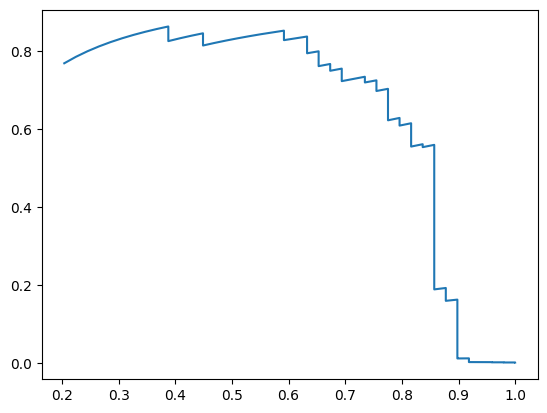

In [62]:
plt.plot(scores['recall'],scores.precision)

In [64]:
scores[scores.recall >=0.9].threshold.max()

0.0005352667084212243